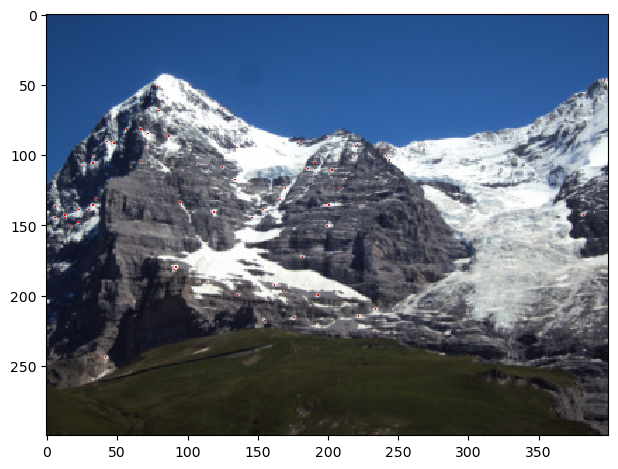

In [4]:
from scipy import signal as sig,ndimage
import numpy as np
from skimage.io import imread,imshow
from skimage.color import rgb2gray

img = imread('M1.JPG')
img_gray=rgb2gray(img)

#imshow(img_gray)


width = np.shape(img_gray)[1] # largeur et hauteurs de l'image
height = np.shape(img_gray)[0]

Sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]) # filtre de sobel pour la dérivée en x 
Sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]) # filtre de sobel pour la dérivée en y

Ix = sig.convolve2d(img_gray, Sobel_x, mode='same') # convolution par le filtre de Sobel
Iy = sig.convolve2d(img_gray, Sobel_y, mode='same')


Ix2= np.square(Ix) # les trois calculs pour la matrice M
Iy2=np.square(Iy)
IxIy= (Ix*Iy)

img_copy_for_corners = np.copy(img) # on créer une copie pour ne pas altérer l'imgae d'originie
k=0.01 # paramètre à ajuster

for x in range(height-1): 
    for y in range(width-1):
        Mx = np.sum(Ix2[x-1:x+1, y-1:y+1]) # on calcule les sommes sur notre fenêtre 
        My = np.sum(Iy2[x-1:x+1, y-1:y+1])
        Mxy = np.sum(IxIy[x-1:x+1, y-1:y+1])
        deter = (Mx * My) - (Mxy**2) 
        trace = Mx + My
        C = deter - k*(trace**2) # calcul du critère pour le seuillage des points d'intérêts
        if C >5 :
            img_copy_for_corners[x, y] = [255,0,0] # on met en rouge les points d'intérêts
            
for x in range(height-1): 
    for y in range(width-1):
        intvect = [img_gray[x][y],img_gray[x-1][y],img_gray[x+1][y],img_gray[x-1][y-1],img_gray[x+1][y-1],img_gray[x][y-1],img_gray[x][y+1],img_gray[x-1][y+1],img_gray[x+1][y+1]]
        if np.max(intvect) != img_gray[x][y] : 
            img_copy_for_corners[x][y] = img[x][y]
            
imshow(img_copy_for_corners)

                

In [113]:
'''for x in range(height-1): 
    for y in range(width-1):
        intvect = [img_gray[x][y],img_gray[x-1][y],img_gray[x+1][y],img_gray[x-1][y-1],img_gray[x+1][y-1],img_gray[x][y-1],img_gray[x][y+1],img_gray[x-1][y+1],img_gray[x+1][y+1]]
        if np.max(intvect) != img_gray[x][y] : 
            img_gray[x][y] = 0'''



Sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]) # filtre de sobel pour la dérivée en x 
Sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]) # filtre de sobel pour la dérivée en y

Ix = sig.convolve2d(img_gray, Sobel_x, mode='same') # convolution par le filtre de Sobel
Iy = sig.convolve2d(img_gray, Sobel_y, mode='same')


Ix2= np.square(Ix) # les trois calculs pour la matrice M
Iy2=np.square(Iy)
IxIy= (Ix*Iy)

img_copy_for_corners = np.copy(img) # on créer une copie pour ne pas altérer l'imgae d'originie
k=0.01 # paramètre à ajuster

for x in range(height-1): 
    for y in range(width-1):
        Mx = ndi.gaussian_filter(Ix2, sigma=1)
        My = ndi.gaussian_filter(Iy2, sigma=1)
        Mxy = ndi.gaussian_filter(I_y**2, sigma=1)
        deter = (Mx * My) - (Mxy**2) 
        trace = Mx + My
        C = deter - k*(trace**2) # calcul du critère pour le seuillage des points d'intérêts
        if C >5 :
            img_copy_for_corners[x, y] = [255,0,0] # on met en rouge les points d'intérêts
            
imshow(img_copy_for_corners)

NameError: name 'ndi' is not defined